# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## Use case
 This study examines the relationship between Canadian housing prices and residents' income. Our initial analysis using linear regression revealed a significant positive correlation between these two variables. Specifically, we will test the null hypothesis that the coefficient of income in our regression model is equal to zero against the alternative hypothesis that it is positive.

## Adding one more dataset
Data from statistic Canada :https://www150.statcan.gc.ca/n1/pub/71-607-x/71-607-x2019007-eng.htm 
It contains After-tax median income from year of 2003 to 2022

- Adding income data and merged into previous data(house price): The data downloaded is based on annual data. We distributed the annual data evenly across each month to generate monthly data, and then merge it with other data.
- Data Exploration

C:\Users\Akindele Awe David\AppData\Local\Temp\ipykernel_24388\2596439122.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  self.income_data['Median income'] = self.income_data['Median income'].str.replace('$', '').str.replace(',', '').astype(float)


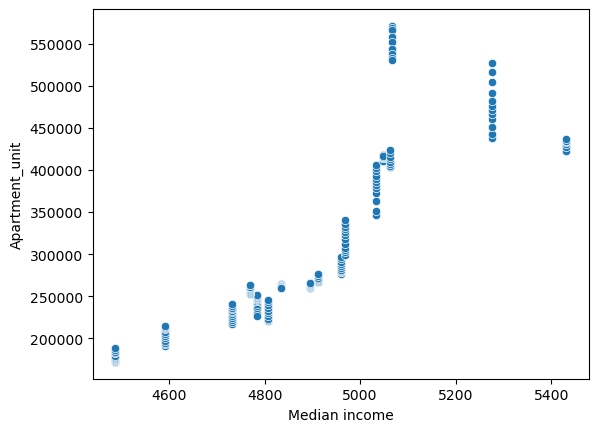

Spearman coefficient: 0.9584816842388347
P_value: 4.8689729885994375e-118


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import spearmanr

class IncomeDataProcessor:
    """
    A class to process income and house price data.
    """

    def __init__(self, income_data_path, original_data_path):
        """
        Initializes the class with the given data paths.

        Args:
            income_data_path (str): Path to the income data CSV file.
            original_data_path (str): Path to the original data Excel file.
        """
        self.income_data = pd.read_csv(income_data_path)
        self.original_data = pd.read_excel(original_data_path)

    def clean_data(self):
        """
        Cleans the income data by removing currency symbols and converting to numeric.
        """
        self.income_data['Median income'] = self.income_data['Median income'].str.replace('$', '').str.replace(',', '').astype(float)

    def convert_to_monthly(self):
        """
        Converts annual income to monthly income and creates a new DataFrame.
        """
        # Create a list to store new data
        new_rows = []
        
        # Loop for income data
        for index, row in self.income_data.iterrows():
            year = row["Reference year"]
            median_income = row["Median income"] / 12  # Convert to monthly income
            
            for month in range(1, 13):
                date_str = f"{year}-{month:02d}-01"
                date = pd.to_datetime(date_str, format='%Y-%m-%d')
                
                new_row = {
                    "Date": date,
                    "Median income": median_income,
                    "Count of families": row["Count of families"],
                    "Family type": row["Family type"],
                    "Geography": row["Geography"],
                    "Selected income concept": row["Selected income concept"]
                }
                new_rows.append(new_row)
        
        # Create new DataFrame and store it as monthly_data
        self.monthly_data = pd.DataFrame(new_rows)
        
        return self.monthly_data
    def merge_data(self):
        """
        Merges the income data with the original data based on the 'Date' column.
        """
        self.monthly_data['Date'] = pd.to_datetime(self.monthly_data['Date'], format='%Y-%m-%d')
        newdata = pd.merge(self.original_data, self.monthly_data[['Date', 'Median income']], on='Date', how='left')
        self.merged_data = newdata.head(215)

    def exploratory_data_analysis(self):
        """
        Performs exploratory data analysis, including:
            - Visualizing the relationship between income and house price
            - Calculating correlation coefficient and p-value
            - Fitting a linear regression model
        """
        # Visualize relationship
        sns.scatterplot(x='Median income', y='Apartment_unit', data=self.merged_data)
        plt.show()

        # Correlation analysis
        #Calculate Spearman coefficient and p_value
        spearman_corr, p_value = spearmanr(self.merged_data['Apartment_unit'], self.merged_data['Median income'])
        print(f"Spearman coefficient: {spearman_corr}")
        print(f"P_value: {p_value}")

    def save_data(self, output_path):
        """
        Saves the merged data to a CSV file.
        """
        self.merged_data.to_csv(output_path, index=False)

# Example usage
processor = IncomeDataProcessor('incomedata.csv', 'News_release_chart_data_August_2024.xlsx')
processor.clean_data()
processor.convert_to_monthly()
processor.merge_data()
processor.exploratory_data_analysis()
processor.save_data('mergeddata.csv')


## Hypothesis Testing :
Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample data. It involves testing an assumption (hypothesis) about a population parameter, such as the mean or proportion, to determine if there is enough evidence to reject that assumption.

Null Hypothesis (H₀):
The null hypothesis is the default or baseline assumption that there is no effect, no relationship, or no difference in the population or dataset. It assumes that any observed variation or effect in the data is due to random chance, not a real underlying cause. The null hypothesis is usually what you aim to test against and potentially reject.

Alternative Hypothesis (H₁):
The alternative hypothesis represents the assumption that there is an effect, a relationship, or a difference in the population or dataset. It is what us data scientists aims to support through data analysis. If the null hypothesis is rejected, it implies that the alternative hypothesis is more likely to be true based on the evidence.

 Usually set at 0.05, this determines the threshold for rejecting the null hypothesis.

Hypothesis for our project: \
Null Hypothesis (H₀): There is no significant linear correlation between average Canadian household income and house prices (i.e., no relationship or a negative relationship between household income and house prices/ as income increases, house prices do not increase, or there is no consistent relationship between them).

Alternative Hypothesis (H₁): There is a significant positive linear correlation between average Canadian household income and house prices (i.e., as income increases, house prices also increase).

## The Spearman coefficient statistical test is chosen
- The data does not have a normal distribution
- They are cardinal data

## Summary

- Spearman coefficient 0.95: indicates that there is a strong correlation, as median income increases, apartment unit prices (Apartment_unit) also tend to increase.
- p_value: 4.8689729885994375e-118: This value is much lower than the common significance level of α=0.05. This means that there is sufficient evidence to reject the null hypothesis and conclude that there is a significant correlation.
- **Conclusion:**
    - The null hypothesis is rejected: There is a significant correlation between apartment prices and median income.
    - The correlation is strong, suggesting that as median income increases, apartment unit prices also tend to increase.

    \
    \
    \
    \
    \


    **why we didnt consider using other tests** \
    We wouldn’t typically use a Wilcoxon test to predict house prices using median income because the Wilcoxon test is a non-parametric statistical test that is designed to compare two paired or independent samples when the data is not normally distributed. It is used to determine if there are significant differences between the two samples, rather than for prediction purposes. This test does not establish a relationship between variables or perform predictions. Instead, it looks for differences between two groups of data, which is unrelated to your goal of predicting house prices based on median income.

    We also cant use Z statistic because even though it uses data where there isn't normal distribution, it is used when the sample size is considerably large.

    We also wouldn't use Chi square because it is is appropriate when you're working with categorical data and want to see if there’s a relationship between two variables. For example, we would use Chi-Square if we categorized house prices (e.g., "expensive" vs. "affordable") and median income into categories (e.g., "high income" vs. "low income"). The Chi-Square test could tell us if there's an association between those categories,

    Most Suitable test: Spearman's Rank Correlation Coefficient: A non-parametric test that measures the strength and direction of the monotonic relationship between two variables, useful when data is not normally distributed. Spearman’s coefficient measures whether, as one variable increases, the other variable consistently increases or decreases.

